In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.oauth2 import service_account
from google.cloud import bigquery

Connect to BQ and Query BQ

In [6]:
credentials = service_account.Credentials.from_service_account_file(
"C:/Users/miria/Desktop/music-recommendation-system-24-3d0d21fb1f8b.json")
# music-recommendation-system-24-3d0d21fb1f8b.json is the service account JSON file. Save the file locally on your device and add the path here.
# make sure that the slashes in the path are '/' and not '\'

project_id = 'music-recommendation-system-24'
client = bigquery.Client(credentials= credentials,project=project_id)

In [7]:
query_job = client.query("""
   SELECT
      *
   FROM `music-recommendation-system-24.ml_tables_eu.song_list_obama_wo_duplicates_view`
   """)
#put the query in three quote marks

results = query_job.result() # Wait for the job to complete.

rows = [dict(row) for row in results]

# Convert the list of dictionaries to a DataFrame
df_bq = pd.DataFrame(rows)

In [8]:
df_bq.head()

,acousticness,danceability,duration_min,energy,genres,instrumentalness,key_name,liveness,loudness,mode,speechiness,track_album_name,track_album_release_year,track_artist,track_id,track_name,track_popularity,tempo,valence,in_obama_playlist
0,6.87,61.4,3.08,64.7,latin,0.0000,C,10.4,-4.681,minor,5.24,What Am I,2019,Why Don't We,1HimGOB6BjOaCQYMIF1xtU,What Am I,79,164,36.8,0
1,14.10,79.5,5.08,71.5,latin,0.0002,C#,17.9,-3.582,major,8.38,Bellaquita (Remix),2019,Dalex,1Xnn1TPyr5h0hpRAT4B4EA,Bellaquita - Remix,87,166,75.8,0
2,60.30,72.6,2.39,40.8,r&b,0.0000,B,22.5,-6.606,minor,6.14,Over It,2019,Summer Walker,2xyx0o4xNOLLjBSbOOdcbA,Playing Games (with Bryson Tiller) - Extended ...,80,116,45.9,0
3,46.20,67.8,3.02,53.3,pop,21.9000,E,13.9,-10.485,major,18.60,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019,Billie Eilish,3XF5xLJHOQQRbWya6hBp7d,you should see me in a crown,84,150,32.3,0
4,9.48,72.9,4.07,60.3,rap,0.0000,F#,11.3,-6.736,minor,6.66,Sanguine Paradise,2019,Lil Uzi Vert,3XiNC94b4Tq1xwv70sQJGN,Sanguine Paradise,82,135,20.7,0


In [10]:
# Create the contingency table with cumulative values
df_columns_to_keep = df_bq[['key_name', 'genres', 'mode', 'in_obama_playlist']]
df_columns_to_keep.head()

,key_name,genres,mode,in_obama_playlist
0,C,latin,minor,0
1,C#,latin,major,0
2,B,r&b,minor,0
3,E,pop,major,0
4,F#,rap,minor,0


In [11]:
df_columns_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28582 entries, 0 to 28581
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   key_name           28582 non-null  object
 1   genres             28582 non-null  object
 2   mode               28582 non-null  object
 3   in_obama_playlist  28582 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 893.3+ KB


bar plots showing the number of datapoints for Obama/not Obama for each categorical variable

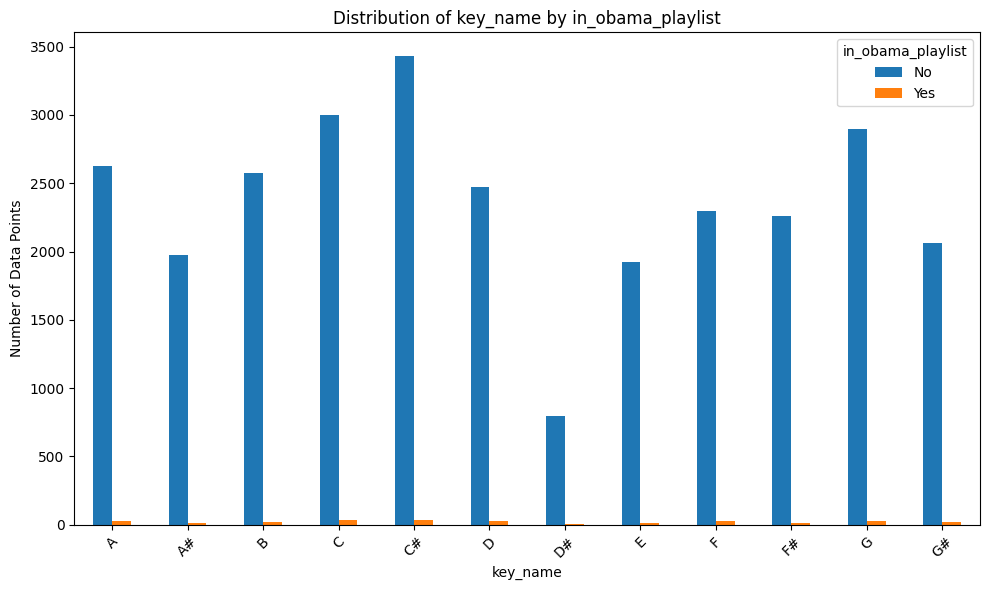

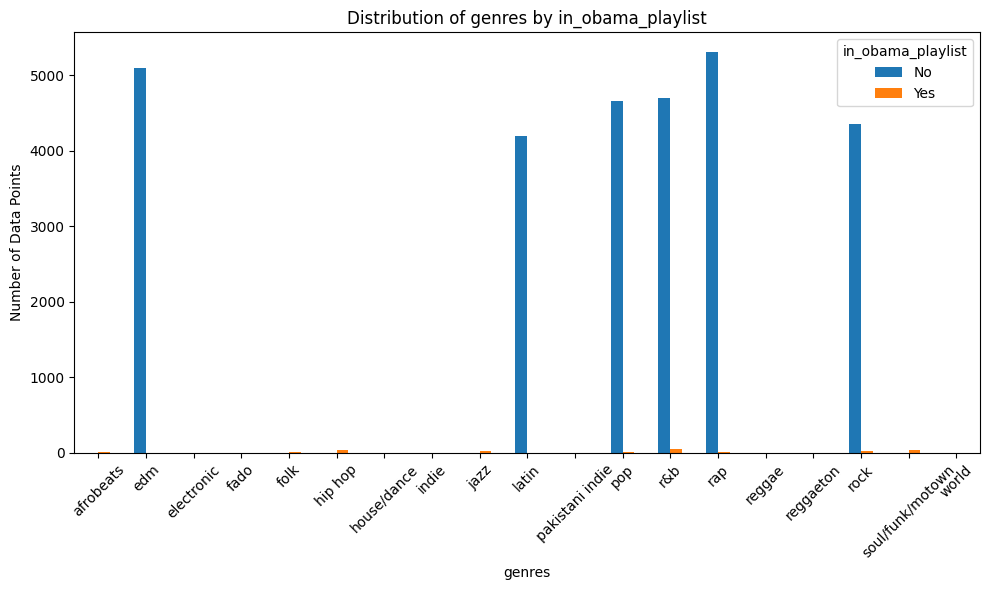

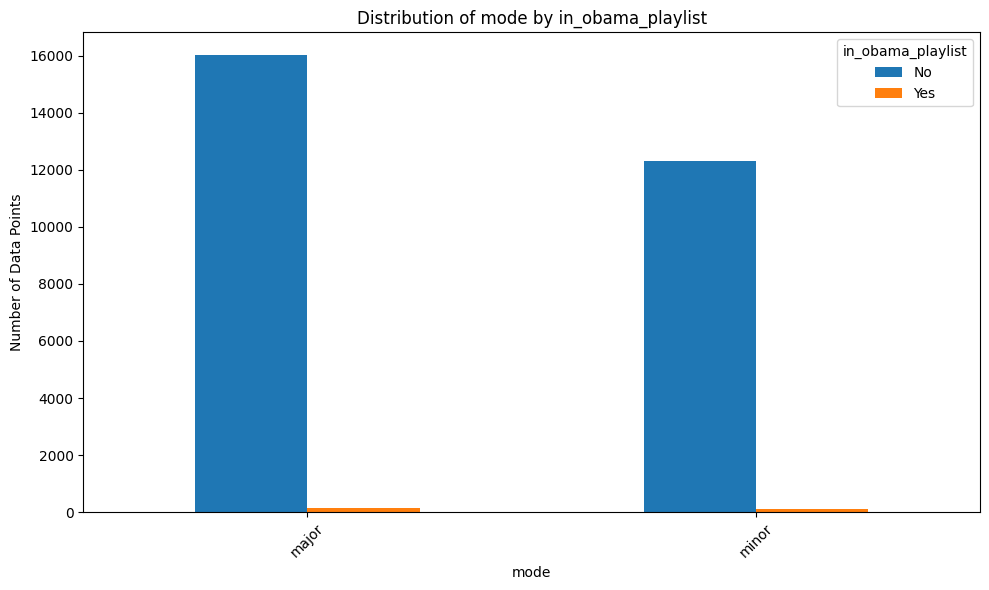

In [13]:
# List of categorical variables
categorical_vars = ['key_name', 'genres', 'mode']

# Create bar plots for each categorical variable
for var in categorical_vars:
    # Group by the categorical variable and 'is_in_obama_playlist'
    grouped_data = df_columns_to_keep.groupby([var, 'in_obama_playlist']).size().unstack(fill_value=0)
    
    # Plot the data
    grouped_data.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribution of {var} by in_obama_playlist')
    plt.xlabel(var)
    plt.xticks(rotation=45)
    plt.ylabel('Number of Data Points')
    plt.legend(title='in_obama_playlist', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.show()

## Contingency tables for categorical variables 'key', 'genre', 'mode'

number of occurrances for each categorical value for both groups 0 and 1 (in_obama_playlist)

In [15]:
# Create an empty dictionary to store contingency tables
contingency_tables = {}

# List of categorical variables
categorical_vars = ['key_name', 'genres', 'mode']

# Generate contingency tables for each categorical variable
for var in categorical_vars:
    # Group by the categorical variable and 'is_in_obama_playlist'
    contingency_table = df_columns_to_keep.groupby([var, 'in_obama_playlist']).size().unstack(fill_value=0)
    
    # Store the contingency table
    contingency_tables[var] = contingency_table
    
    # Display the table
    print(f"Contingency Table for '{var}' grouped by 'in_obama_playlist':")
    print(contingency_table)
    print("\n")


Contingency Table for 'key_name' grouped by 'in_obama_playlist':
in_obama_playlist     0   1
key_name                   
A                  2627  26
A#                 1972  16
B                  2575  22
C                  3000  32
C#                 3433  32
D                  2473  24
D#                  796   6
E                  1924  15
F                  2298  25
F#                 2260  13
G                  2900  30
G#                 2066  17


Contingency Table for 'genres' grouped by 'in_obama_playlist':
in_obama_playlist     0   1
genres                     
afrobeats             0   9
edm                5098   0
electronic            0   5
fado                  0   1
folk                  0   9
hip hop               0  42
house/dance           0   3
indie                 0   2
jazz                  0  26
latin              4195   3
pakistani indie       0   1
pop                4661  18
r&b                4704  48
rap                5305   9
reggae                0   6
re